In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import open_xarray as ox

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

ds=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_resolution/Case_50m/eurec4a.default.0000000.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_resolution/Case_100m/eurec4a.default.0000000.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_400.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_resolution/Case_200m/eurec4a.default.0000000.nc')
ds5=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_resolution/Case_400m/eurec4a.default.0000000.nc')

label1=r'50m'
label2=r'100m'
label3=r'150m'
label4=r'200m'
label5=r'400m'

Text(0.05, 0.44, 'b)')

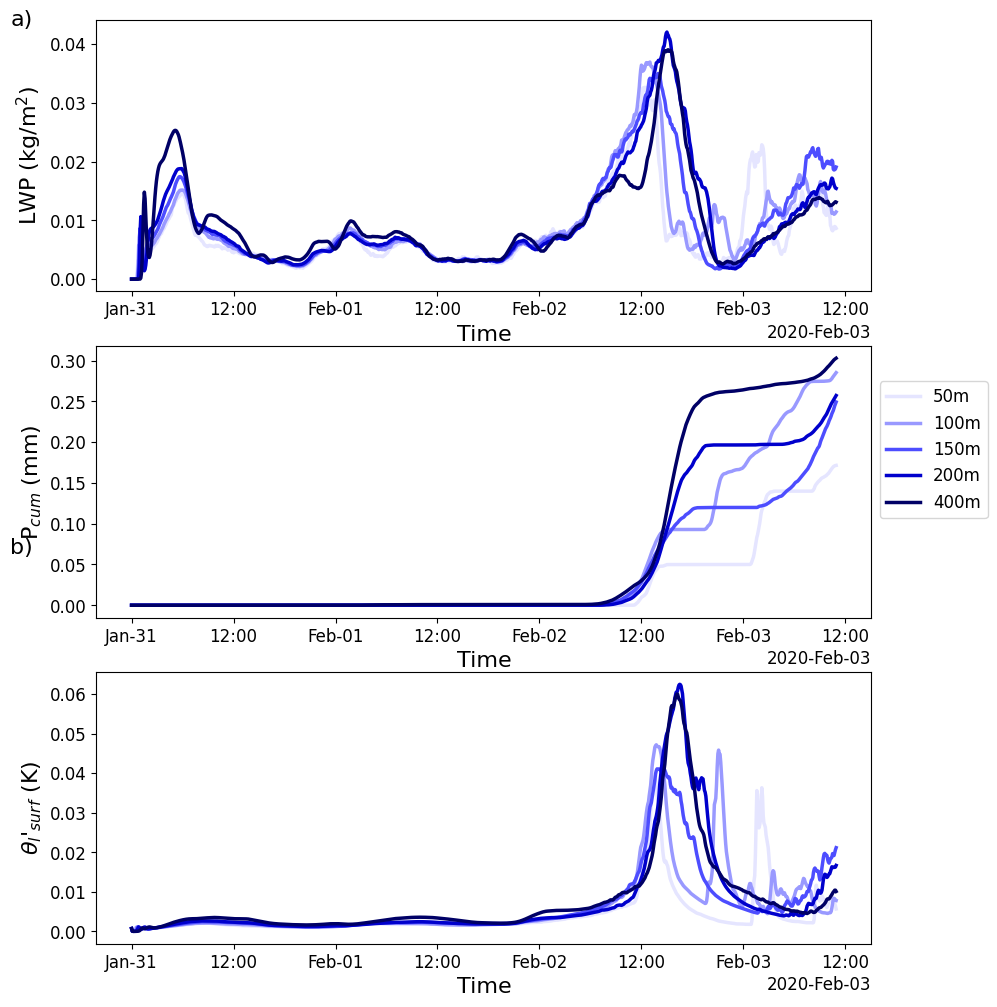

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


fig, axs = pl.subplots(3, 1, figsize=(10, 12))
pl.subplot(311)
ds.ql_path.plot.line(color=lighten_color('b',0.1),lw=2.5,x='time',label=label1)
ds2.ql_path.plot.line(color=lighten_color('b',0.4),lw=2.5,x='time',label=label2)
ds3.ql_path.plot.line(color=lighten_color('b',0.7),lw=2.5,x='time',label=label3)
ds4.ql_path.plot.line(color=lighten_color('b',1.2),lw=2.5,x='time',label=label4)
ds5.ql_path.plot.line(color=lighten_color('b',1.6),lw=2.5,x='time',label=label5)
pl.ylabel(r'LWP (kg/m$^{2}$)')
#pl.xticks([])
#pl.xlabel('')
#pl.show()

pl.subplot(312)
(ds['rr']*300).cumsum().plot.line(color=lighten_color('b',0.1),lw=2.5,x='time',label=label1)
(ds2['rr']*300).cumsum().plot.line(color=lighten_color('b',0.4),lw=2.5,x='time',label=label2)
(ds3['rr']*300).cumsum().plot.line(color=lighten_color('b',0.7),lw=2.5,x='time',label=label3)
(ds4['rr']*300).cumsum().plot.line(color=lighten_color('b',1.2),lw=2.5,x='time',label=label4)
(ds5['rr']*300).cumsum().plot.line(color=lighten_color('b',1.6),lw=2.5,x='time',label=label5)
pl.ylabel(r'P$_{cum}$ (mm)')
#pl.show()
#pl.xticks([])
#pl.xlabel('')
pl.subplot(313)
ds.thl_2.isel(z=0).plot.line(color=lighten_color('b',0.1),lw=2.5,x='time',label=label1)
ds2.thl_2.isel(z=0).plot.line(color=lighten_color('b',0.4),lw=2.5,x='time',label=label2)
ds3.thl_2.isel(z=0).plot.line(color=lighten_color('b',0.7),lw=2.5,x='time',label=label3)
ds4.thl_2.isel(z=0).plot.line(color=lighten_color('b',1.2),lw=2.5,x='time',label=label4)
ds5.thl_2.isel(z=0).plot.line(color=lighten_color('b',1.6),lw=2.5,x='time',label=label5)
pl.ylabel(r"$\theta_l$'$_{surf}$ (K)")
pl.title('')

pl.legend(loc='upper left',bbox_to_anchor=(1, 2.1))
pl.figtext(0.05, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.44, 'b)', ha='center', va='center', fontsize=16)

#pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/CDNC_Feb2nd.jpg',dpi=300, bbox_inches='tight')